<a href="https://colab.research.google.com/github/410k/algotradingassignment/blob/main/algo_trading_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install alpha_vantage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
from decimal import *
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly import subplots
from datetime import datetime
from matplotlib import pyplot  as plt
import mplfinance as mpf



In [ ]:
from alpha_vantage.timeseries import TimeSeries

In [ ]:
class ScriptData:
    def __init__(self):
        self.api_key = 'Y9OKFNY5B2Z55IMI'
        self.stored_df = {}

    def __getitem__(self, script):
        return self.stored_df[script]

    def __setitem__(self, script, df):
        self.stored_df[script] = df

    def __contains__(self, script):
        if script in self.stored_df:
            return True

    def fetch_intraday_data(self, script):
        self.ts = TimeSeries(self.api_key, output_format='pandas')

    def convert_intraday_data(self, script):
        df, meta = self.ts.get_intraday(script, interval='60min')
        df.reset_index(level=0, inplace=True)
        df.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']
        df['volume'] = df['volume'].astype(np.int64)
        df = df[::-1]
        df.reset_index(level=0, inplace=True)
        df = df.drop(['index'], axis=1)
        self.__setitem__(script, df)
        return df

In [ ]:
script_data = ScriptData()
script_data.fetch_intraday_data('GOOGL')
script_data.convert_intraday_data('GOOGL')
script_data['GOOGL']

,timestamp,open,high,low,close,volume
0,2023-06-08 16:00:00,122.1400,122.4500,121.94,122.0999,1941030
1,2023-06-08 17:00:00,122.0700,122.3878,122.07,122.2700,76733
2,2023-06-08 18:00:00,122.2626,122.2700,122.05,122.1400,19427
3,2023-06-08 19:00:00,122.0500,122.1200,121.82,122.0200,27969
4,2023-06-09 04:00:00,122.0200,122.2000,121.67,121.7600,8266
...,...,...,...,...,...,...
95,2023-06-16 15:00:00,123.8600,124.2200,123.28,123.5300,6539800
96,2023-06-16 16:00:00,123.5300,123.9800,123.32,123.7500,4820845
97,2023-06-16 17:00:00,123.7500,123.8200,123.53,123.7300,1016496
98,2023-06-16 18:00:00,123.7300,123.7900,123.67,123.6700,8930


In [ ]:
script_data.fetch_intraday_data('AAPL')
script_data.convert_intraday_data('AAPL')

,timestamp,open,high,low,close,volume
0,2023-06-08 16:00:00,180.58,180.745,180.5000,180.56,2901493
1,2023-06-08 17:00:00,180.57,180.570,180.4300,180.47,74265
2,2023-06-08 18:00:00,180.47,180.560,180.4229,180.43,56697
3,2023-06-08 19:00:00,180.45,180.520,180.3200,180.50,53536
4,2023-06-09 04:00:00,180.19,180.420,180.0000,180.40,44313
...,...,...,...,...,...,...
95,2023-06-16 15:00:00,184.90,185.350,184.2700,185.01,11935261
96,2023-06-16 16:00:00,184.92,185.200,184.9015,185.01,15064383
97,2023-06-16 17:00:00,185.02,185.040,184.9200,184.93,123445
98,2023-06-16 18:00:00,184.93,184.980,184.9200,184.92,5007


In [ ]:
'GOOGL' in script_data

True

In [ ]:
'AAPL' in script_data

True

In [ ]:
'NVDA' in script_data

False

In [ ]:
def indicator1(df, timeperiod):
    df['indicator'] = df['close'].rolling(timeperiod).mean()
    df = df[['timestamp', 'indicator']]
    return df

In [ ]:
indicator1(script_data['GOOGL'], timeperiod=5)

,timestamp,indicator
0,2023-06-08 16:00:00,NaN
1,2023-06-08 17:00:00,NaN
2,2023-06-08 18:00:00,NaN
3,2023-06-08 19:00:00,NaN
4,2023-06-09 04:00:00,122.05798
...,...,...
95,2023-06-16 15:00:00,124.26600
96,2023-06-16 16:00:00,124.09600
97,2023-06-16 17:00:00,123.86500
98,2023-06-16 18:00:00,123.70800


In [ ]:
indicator1(script_data['AAPL'], timeperiod=5)

,timestamp,indicator
0,2023-06-08 16:00:00,NaN
1,2023-06-08 17:00:00,NaN
2,2023-06-08 18:00:00,NaN
3,2023-06-08 19:00:00,NaN
4,2023-06-09 04:00:00,180.472
...,...,...
95,2023-06-16 15:00:00,185.438
96,2023-06-16 16:00:00,185.286
97,2023-06-16 17:00:00,185.086
98,2023-06-16 18:00:00,184.954


In [ ]:
class Strategy(ScriptData):
    def __init__(self, script):
        self.script = script
        self.indicator_data = {}
        self.close_data = {}
        ScriptData.__init__(self)

    def get_script_data(self):
        ScriptData.fetch_intraday_data(self, self.script)
        data = ScriptData.convert_intraday_data(self, self.script)
        indicator_data = indicator1(data, timeperiod=5)
        self.indicator_data[self.script] = indicator_data
        data = data[['timestamp', 'close']]
        self.close_data[self.script] = data

    def get_signals(self):

        # 1. BUY (When: If indicator_data cuts close_data upwards)
        # 2. SELL (When: If indicator_data cuts close_data downwards)
        # 3. NO_SIGNAL (When: If indicator_data and close_data don’t cut
        # each other)

        def signal_funct(i):
            if i['indicator'] > i['close']:
                return 'BUY'
            elif i['indicator'] < i['close']:
                return 'SELL'
            else:
                return 'NO_SIGNAL'

        indicator_data = self.indicator_data[self.script]
        df = self.close_data[self.script]
        df = df.merge(indicator_data)
        df['indication_signal'] = df.apply(signal_funct, axis=1)

        ind = df.loc[:, 'indication_signal']
        timestamp = df.loc[:, 'timestamp']

        t = []
        d = []

        for i in range(1, len(df.index)):
            curr, prev = i, i - 1
            if ind[prev] != ind[curr]:
                t.append(timestamp[curr])
                d.append(ind[curr])

        return pd.DataFrame({
            'timestamp': t,
            'signal': d
        })

In [ ]:
strategy = Strategy('NVDA')
strategy.get_script_data()
strategy.get_signals()

,timestamp,signal
0,2023-06-09 04:00:00,SELL
1,2023-06-09 11:00:00,BUY
2,2023-06-12 04:00:00,SELL
3,2023-06-12 08:00:00,BUY
4,2023-06-12 12:00:00,SELL
5,2023-06-13 07:00:00,BUY
6,2023-06-13 08:00:00,SELL
7,2023-06-14 06:00:00,BUY
8,2023-06-14 09:00:00,SELL
9,2023-06-15 04:00:00,BUY


In [ ]:
# Plotting a candlestick chart
def chart(df2,avg=3):
    df2.timestamp=pd.to_datetime(df2.timestamp) #changing the data type from object to datetime
    df2=df2.set_index("timestamp")
    df2=df2.iloc[::-1]
    mpf.plot(df2['2023-06-08 16:00:00':'2023-06-16  19:00:00'],figratio=(30,10),type='candle',volume=True,style='yahoo')

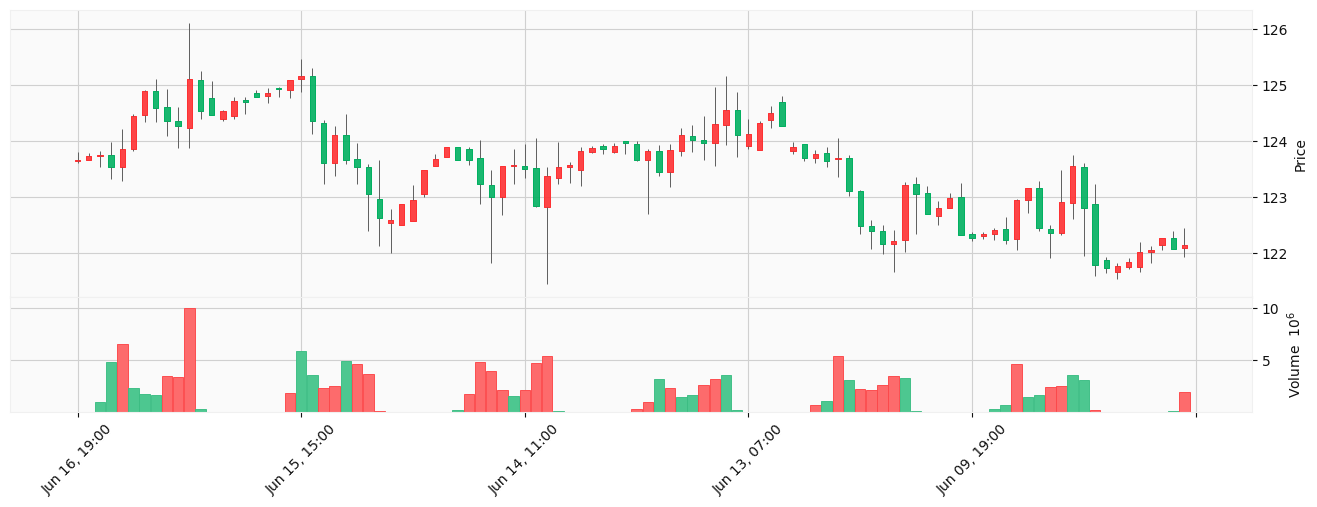

In [ ]:
chart(script_data['GOOGL'])